COMP 215 - LAB 1
----------------
#### Name:
#### Date:
This lab exercise is mostly to introduce some of the power in Jupyter Notebooks.
Note that a Notebook is composed of "cells" - some are "text", like this one, while others are "code"

The code cell below simply imports all the modules we'll be using...

In [ ]:
import datetime, json, requests
import matplotlib.pyplot as plt
import  matplotlib.dates as mdates
from pprint import pprint

Now, let's fetch some Covid-19 daily case-count data from:  https://opencovid.ca/api/

Query:
  - `stat=cases`        # the type of data to fetch
  - `loc=BC`            # the location to fetch data for
  - `after=01-12-2021`  # since the 1st of december (note date format:  dd-mm-yyyy)

In [ ]:
query = 'https://api.opencovid.ca/timeseries?stat=cases&loc=BC&after=01-12-2021'

response = requests.request("GET", query, headers={}, data={})
print(response.text)

{"cases":[{"cases":386,"cumulative_cases":218812,"date_report":"01-12-2021","province":"BC"},{"cases":368,"cumulative_cases":219180,"date_report":"02-12-2021","province":"BC"},{"cases":404,"cumulative_cases":219584,"date_report":"03-12-2021","province":"BC"},{"cases":0,"cumulative_cases":219584,"date_report":"04-12-2021","province":"BC"},{"cases":0,"cumulative_cases":219584,"date_report":"05-12-2021","province":"BC"},{"cases":946,"cumulative_cases":220530,"date_report":"06-12-2021","province":"BC"},{"cases":326,"cumulative_cases":220856,"date_report":"07-12-2021","province":"BC"},{"cases":379,"cumulative_cases":221235,"date_report":"08-12-2021","province":"BC"},{"cases":341,"cumulative_cases":221576,"date_report":"09-12-2021","province":"BC"},{"cases":437,"cumulative_cases":222013,"date_report":"10-12-2021","province":"BC"},{"cases":0,"cumulative_cases":222013,"date_report":"11-12-2021","province":"BC"},{"cases":0,"cumulative_cases":222013,"date_report":"12-12-2021","province":"BC"},{"

Notice that the response is just a string of text (most data is exchanged on the web as plain text!)

The `json.loads` function "parses" such text and loads the data into a dictionary...

In [ ]:
result = json.loads(response.text)
#pprint(result) # remove this comment and re-run this cell to see the resulting dictionary

Next we use "list comprehension" to extract the list of dates and associated cases into "parallel lists"

Notice how we convert the date strings, using strptime, into a real date objects so they are easier to work with (format: dd-mm-yyyy)

In [ ]:
date_strings = [daily['date_report'] for daily in result['cases']]
dates = [datetime.datetime.strptime(date, '%d-%m-%Y').date() for date in date_strings]
cases = [daily['cases'] for daily in result['cases']]
print(dates)
print(cases)

[datetime.date(2021, 12, 1), datetime.date(2021, 12, 2), datetime.date(2021, 12, 3), datetime.date(2021, 12, 4), datetime.date(2021, 12, 5), datetime.date(2021, 12, 6), datetime.date(2021, 12, 7), datetime.date(2021, 12, 8), datetime.date(2021, 12, 9), datetime.date(2021, 12, 10), datetime.date(2021, 12, 11), datetime.date(2021, 12, 12), datetime.date(2021, 12, 13), datetime.date(2021, 12, 14), datetime.date(2021, 12, 15), datetime.date(2021, 12, 16), datetime.date(2021, 12, 17), datetime.date(2021, 12, 18), datetime.date(2021, 12, 19), datetime.date(2021, 12, 20), datetime.date(2021, 12, 21), datetime.date(2021, 12, 22), datetime.date(2021, 12, 23), datetime.date(2021, 12, 24), datetime.date(2021, 12, 25), datetime.date(2021, 12, 26), datetime.date(2021, 12, 27), datetime.date(2021, 12, 28), datetime.date(2021, 12, 29), datetime.date(2021, 12, 30), datetime.date(2021, 12, 31), datetime.date(2022, 1, 1), datetime.date(2022, 1, 2), datetime.date(2022, 1, 3), datetime.date(2022, 1, 4), d

## Exercise 1

In the code cell below, re-write each of the 3 "list comprehensions" above as a loop so you understand how they work.

Notice that a "list comprehension" is a compact way to write a "list accumlator" algorithm (and more efficient too!)

In [ ]:
# Your code here


Finally, we'll plot the (dates,cases) data as a nice x-y line graph.

The code to format the x-axis labels is taken from https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html



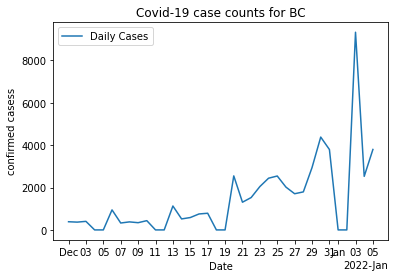

In [ ]:
def format_date_axis(ax):
  """ format the dates shown on the x-axis of given axes, ax  """
  locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
  formatter = mdates.ConciseDateFormatter(locator)
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(formatter)

fig, ax = plt.subplots()
format_date_axis(ax)
ax.plot(dates, cases, label='Daily Cases')  # Plot some data on the axes.
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('confirmed casess')  # Add a y-label to the axes.
ax.set_title("Covid-19 case counts for BC")  # Add a title to the axes.
ax.legend();

## Exercise 2

Repeat the analysis above, but this time only for Vancouver Coastal Health Region.

 * Try to modify as little code as you can (should be just a few characters), and re-run the analysis
 * You can get the location code for each health region here:  https://opencovid.ca/api/#health-region-codes
 * Can you generalize the code in the 2nd code cell to make it easier to repeat the analysis for different locations?  What about for different dates?

## Exercise 3

Notice that BC does not report case counts on weekends so the data plot looks erratic.

 * One way to fix that is to plot a "7-day rolling average" instead.
Each day, we take the average of the previous 7 days cases.
 * Add new code cell below, compute the 7-day rolling average for each day from the cases list.
 * Create a plot to display the rolling average data and compare your plost with the one produced above.

 Hints: you are free to do this however you like, but a quite elegant solution uses list comprehension, range, and slices
